## MOTR Attention Visualization 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image



In [3]:
def visualize_attention_map(original_image_path, attention_map):
    """
    元の画像とAttention mapを重ねて可視化する関数
    :param original_image_path: 元の画像のパス
    :param attention_map: Attention map (NumPy配列)
    """
    # 元の画像を読み込む
    original_image = Image.open(original_image_path)

    # Attention mapを元の画像のサイズにリサイズ
    resized_attention_map = np.array(Image.fromarray(attention_map).resize(original_image.size))

    # Attention mapをRGB画像に変換
    attention_map_rgb = np.zeros_like(original_image)
    attention_map_rgb[:, :, 0] = resized_attention_map * 255  # Redチャンネル
    attention_map_rgb[:, :, 1] = 0  # Greenチャンネル
    attention_map_rgb[:, :, 2] = (1 - resized_attention_map) * 255  # Blueチャンネル

    # 元の画像とAttention mapを重ねて表示 
    plt.imshow(original_image)
    plt.imshow(attention_map_rgb, alpha=0.5)  # Attention mapを半透明で重ねる
    plt.axis('off')
    plt.show()

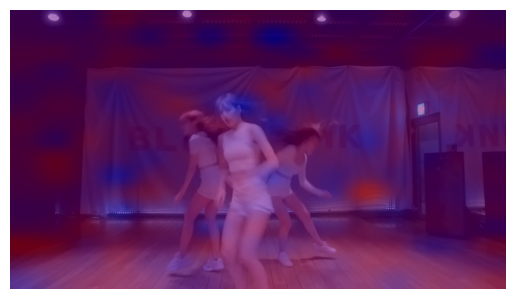

In [5]:
# 使用例
load_array = np.loadtxt('save.txt')
original_image_path = "data/Dataset/mot/DanceTrack/val/dancetrack0004/img1/00000002.jpg"  # 元の画像のパス
attention_map = load_array.reshape(16, 16)  # Attentionマップの画像
visualize_attention_map(original_image_path, attention_map)

In [2]:
# ------------------------------------------------------------------------
# Copyright (c) 2021 megvii-model. All Rights Reserved.
# ------------------------------------------------------------------------
# Modified from Deformable DETR (https://github.com/fundamentalvision/Deformable-DETR)
# Copyright (c) 2020 SenseTime. All Rights Reserved.
# ------------------------------------------------------------------------


# for dance
# sh configs/r50_motr_train_dance.sh


#evaluation phase
!python3 eval_sub.py \
     --meta_arch motr \
     --dataset_file e2e_joint \
     --with_box_refine \
     --lr_drop 100 \
     --lr 2e-4 \
     --lr_backbone 2e-5 \
     --output_dir 'exps_dance/tracktest2' \
     --batch_size 1 \
     --sample_mode 'random_interval' \
     --sample_interval 10 \
     --sampler_steps 50 90 120 \
     --sampler_lengths 2 3 4 5 \
     --update_query_pos \
     --merger_dropout 0 \
     --dropout 0 \
     --random_drop 0.1 \
     --fp_ratio 0.3 \
     --query_interaction_layer 'QIM' \
     --extra_track_attn  \
     --resume 'weight/model_dance_final.pth'



/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Training with Extra Self Attention in Every Decoder.
Training with Self-Cross Attention.
loaded weight/model_dance_final.pth
solve dancetrack0004
  0%|                                                  | 0/1203 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the inde